1. Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need.

In [1]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
#from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
bottle_df = pd.read_csv("Assignment_data/bottle.csv")
bottle_df.head(2)

/Users/trimpu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
bottle_df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [3]:
bottle_df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [4]:
bottle_df['STheta'].mean()

25.819393737363907

In [5]:
#replace all NaN values with a mean value.
bottle_df['STheta'].replace(np.NaN,bottle_df['STheta'].mean()).head(40)

0     25.649000
1     25.656000
2     25.654000
3     25.643000
4     25.643000
5     25.651000
6     25.658000
7     25.682000
8     25.710000
9     25.801000
10    25.819000
11    25.900000
12    25.975000
13    26.043000
14    26.256000
15    26.274000
16    26.315000
17    25.819394
18    26.396000
19    26.483000
20    26.519000
21    26.695000
22    26.741000
23    26.885000
24    26.980000
25    26.982000
26    27.054000
27    27.128000
28    27.198000
29    25.335000
30    25.363000
31    25.385000
32    25.404000
33    25.480000
34    25.732000
35    25.760000
36    25.926000
37    25.962000
38    26.121000
39    26.162000
Name: STheta, dtype: float64

In [6]:
#drops "TA1" column
bottle_df.drop("TA1", axis=1)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.91,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.91,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.92,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,1.08,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bottle_df[bottle_df["R_SAMP"].notnull()]

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
683767,27849,683768,093.3 026.7,19-9501JD-MX-004-2016-09330267-0001A-3,1,14.260,33.3960,6.050,24.89400,103.80,...,0.31,1,201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683768,27849,683769,093.3 026.7,19-9501JD-MX-004-2016-09330267-0006A-3,6,14.290,33.3960,6.060,24.88800,104.00,...,0.33,6,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683770,27849,683771,093.3 026.7,19-9501JD-MX-004-2016-09330267-0012A-3,12,14.300,33.4010,6.060,24.89000,104.00,...,0.31,12,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683772,27849,683773,093.3 026.7,19-9501JD-MX-004-2016-09330267-0022A-3,22,14.320,33.4060,6.030,24.89000,103.50,...,0.30,22,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683774,27849,683775,093.3 026.7,19-9501JD-MX-004-2016-09330267-0031A-3,31,14.230,33.4110,5.990,24.91300,102.70,...,0.27,31,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864857,34403,864858,093.3 120.0,20-1611SR-MX-313-2053-09331200-0521A-3,521,5.818,34.2382,0.366,26.98477,5.23,...,NaN,525,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
revised_bottle_df = pd.DataFrame(bottle_df[["T_degC", "Salnty", "STheta"]])
revised_bottle_df

,T_degC,Salnty,STheta
0,10.500,33.4400,25.64900
1,10.460,33.4400,25.65600
2,10.460,33.4370,25.65400
3,10.450,33.4200,25.64300
4,10.450,33.4210,25.64300
...,...,...,...
864858,18.744,33.4083,23.87055
864859,18.744,33.4083,23.87072
864860,18.692,33.4150,23.88911
864861,18.161,33.4062,24.01426


In [9]:
cast_df = pd.read_csv("Assignment_data/cast.csv")
cast_df.tail()

/Users/trimpu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0
34403,34404,2016-11-06-C-33SR,201611,20161109340264,9340264,20-1611SR-MX-310-22:39-09340264,093.4 026.4,4,ST,-1.558,...,8.0,25.0,2.0,1015.4,20.0,17.5,1.0,2.0,2.0,6.0


In [10]:
cast_df.columns

Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')

In [11]:
#checking for missing values
cast_df.isnull().any().sum()

29

In [12]:
cast_df["Sta_Code"].values

array(['NST', 'NST', 'NST', ..., 'ST', 'ST', 'ST'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cast_df["Sta_Code"] = label_encoder.fit_transform(cast_df["Sta_Code"].values)
cast_df

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,3,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,3,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,3,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,3,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,3,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,6,-254.345,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,6,-294.297,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,6,-334.157,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,6,-373.979,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0


In [14]:
cast_df = pd.get_dummies(cast_df[["Sta_Code"]])
cast_df

,Sta_Code
0,3
1,3
2,3
3,3
4,3
...,...
34399,6
34400,6
34401,6
34402,6


2. Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature.

In [15]:
bottle_df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [16]:
revised_bottle_df.corr()

,T_degC,Salnty,STheta
T_degC,1.000000,-0.505266,-0.829155
Salnty,-0.505266,1.000000,0.603470
STheta,-0.829155,0.603470,1.000000


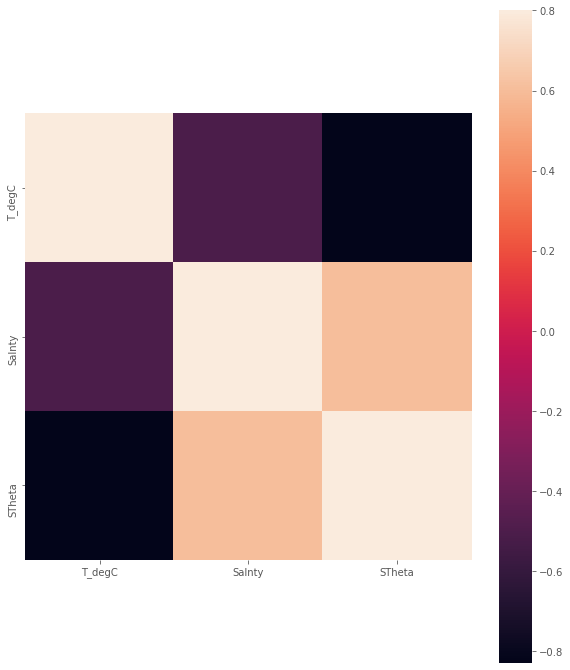

In [17]:
# heat map of correlation of features
correlation_matrix = revised_bottle_df.corr()
#correlation_matrix
fig = plt.figure(figsize=(10,12))
sns.heatmap(correlation_matrix, vmax=0.8, square= True)
plt.show()


<AxesSubplot:>

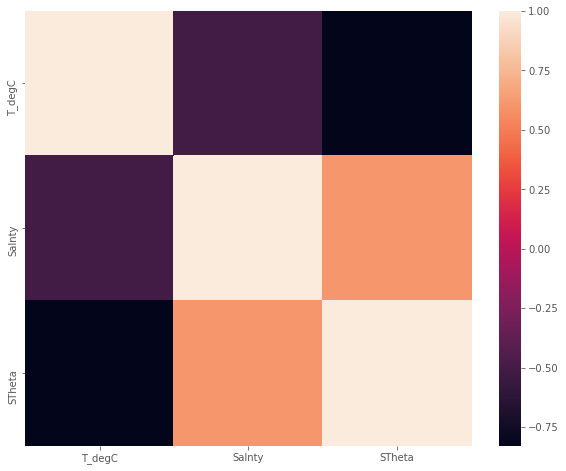

In [18]:
corr=revised_bottle_df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr)

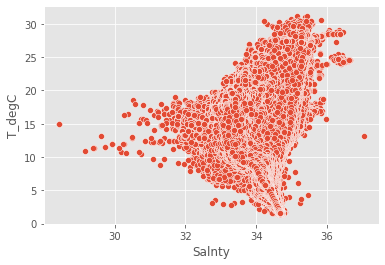

In [19]:
sns.scatterplot(x=revised_bottle_df["Salnty"], y=revised_bottle_df["T_degC"], data = bottle_df)
plt.show()

Plot shows a linear relationship with wide spread. 

3. Perform linear regression on the dataset to see if you can predict water temperature based on salinity.

In [20]:
revised_bottle_df = pd.DataFrame(bottle_df[["T_degC", "Salnty", "STheta"]])
revised_bottle_df = revised_bottle_df.dropna()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = revised_bottle_df["Salnty"].values.reshape(-1,1)
y = revised_bottle_df["T_degC"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1)

In [22]:
regres = LinearRegression()
regres.fit(X_train, y_train)
print(regres.intercept_)

[167.46272225]


In [23]:
y_pred = regres.predict(X_test)
print(y_pred)

[[ 9.16205237]
 [14.28046846]
 [ 8.5881974 ]
 ...
 [ 9.49988634]
 [12.38304477]
 [ 7.39420883]]


In [24]:
modified_df= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(modified_df)

        Actual  Predicted
0         6.32   9.162052
1        15.67  14.280468
2        12.90   8.588197
3        16.31  14.484094
4        16.00  14.821928
...        ...        ...
406082   16.91  13.739009
406083    8.17  10.045974
406084    7.36   9.499886
406085   11.10  12.383045
406086    2.50   7.394209

[406087 rows x 2 columns]


5. Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

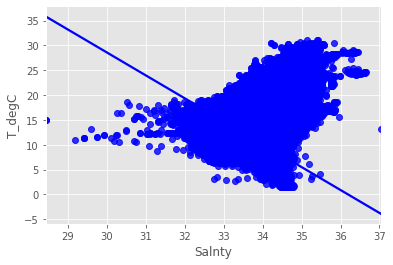

In [25]:
#Relational plots- Scatterplot and line plot. 
#scatterplot with Facetgrid - regplot
sns.regplot(x="Salnty", y="T_degC", data=revised_bottle_df, ci=68, color='Blue', truncate=True)
plt.show()

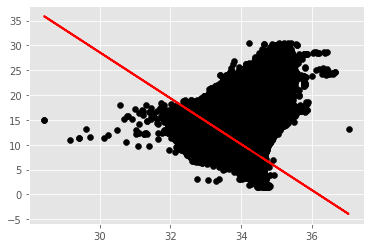

In [26]:
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

4. Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics .

In [27]:
accuracy_score = regres.score(X_test, y_test)
accuracy_score

0.2526067966894444

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2526067966894444

In [29]:
#mean squared error
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

13.326656538812655

In [30]:
#mean absolute error
metrics.mean_absolute_error(y_test, y_pred)

2.6737084607678097

In [31]:
#root mean squared error
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3.6505693444739076

6. Do some research on polynomial regression. Describe what it is any how it works in markdown.

In [ ]:
Polynomial regression allows the model to identify non-linear patterns. 
It is a way of extending linera model with extra predictors. 
Similar to linear regression, it uses relationship between X and Y to find the best accurate way possible. 

7. Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here

In [52]:
from sklearn.preprocessing import PolynomialFeatures
X = revised_bottle_df["Salnty"].values.reshape(-1,1)
y = revised_bottle_df["T_degC"].values.reshape(-1,1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

In [53]:
#poly.fit(X_poly, y)
model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)
y_poly_pred

array([[12.59736826],
       [12.59736826],
       [12.61520764],
       ...,
       [12.74697065],
       [12.8001395 ],
       [12.91094297]])

In [54]:
from sklearn import metrics
mse = metrics.mean_squared_error(y, y_poly_pred)
r2 = r2_score(y, y_poly_pred)
print(mse)
print(r2)

13.013628972853391
0.2695892335608172


8. Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

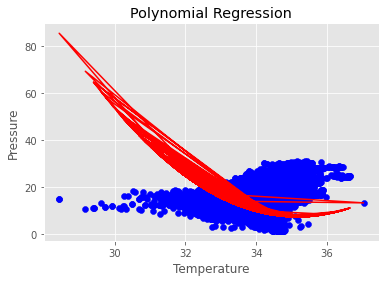

In [51]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, model.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
  
plt.show()